## EA vs NEA feature Visualization
This code reads two files with feature values (EA.txt and NEA.txt), then plots two features at a time on a scatter plot.

#### NEA.txt contains ~50,000 samples, so we randomly sample ~ 1000 points from it to match EA samples

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.naive_bayes import GaussianNB 

# Common Variables
fs_12_6 = (12,6) # Figure size for 2x 6 inch square plots next to each other
fs_12_12 = (12,12) # Figure size for large single figure

def createfigure():
    fig = plt.figure(figsize=fs_12_6, dpi= 80, facecolor='w', edgecolor='k') # Create new figure
    f0 = fig.add_subplot(111) # Main Figure subplot
    f1 = fig.add_subplot(121) # Clusters Figure
    f2 = fig.add_subplot(122) # Classification Boundary Figure
    plt.tight_layout(pad = 5.0)
    #fig.subplots_adjust(hspace=2.0)
    f0.spines['top'].set_color('none')
    f0.spines['bottom'].set_color('none')
    f0.spines['left'].set_color('none')
    f0.spines['right'].set_color('none')
    f0.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
    # return fig, f1, f2 # Returns a tuple which is immutable
    return [fig, f1, f2] # Returns a list which is changable

def createfigure2_2():
    fig = plt.figure(figsize=fs_12_12, dpi= 80, facecolor='w', edgecolor='k') # Create new figure
    f0 = fig.add_subplot(111) # Main Figure subplot
    f1 = fig.add_subplot(221) # Clusters Figure
    f2 = fig.add_subplot(222) # Classification Boundary Figure
    f3 = fig.add_subplot(223) # Classification Boundary Figure
    f4 = fig.add_subplot(224) # Classification Boundary Figure
    plt.tight_layout(pad = 5.0)
    #fig.subplots_adjust(hspace=2.0)
    f0.spines['top'].set_color('none')
    f0.spines['bottom'].set_color('none')
    f0.spines['left'].set_color('none')
    f0.spines['right'].set_color('none')
    f0.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
    # return fig, f1, f2 # Returns a tuple which is immutable
    return [fig, f1, f2, f3, f4] # Returns a list which is changable

In [3]:
dtype_Featurefile = np.dtype([('File_Name', 'S60'), ('mad_roll', np.float64), ('reg_roll', np.float64),
                               ('sum_acc', np.float64), ('manip', np.float64), ('rest_perc', np.float64)])
EAData = np.loadtxt('training-shimmer-ea.txt', dtype = dtype_Featurefile)

dtype_Featurefile = np.dtype([('File_Name', 'S60'), ('mad_roll', np.float64), ('reg_roll', np.float64),
                               ('sum_acc', np.float64), ('manip', np.float64), ('rest_perc', np.float64)])
FullNEAData = np.loadtxt('training-shimmer-non.txt', dtype = dtype_Featurefile)

### Plot all features vs Precentage of time spent in rest (MicroEffort)

Plotting features vs Perecentage of Rest in segment


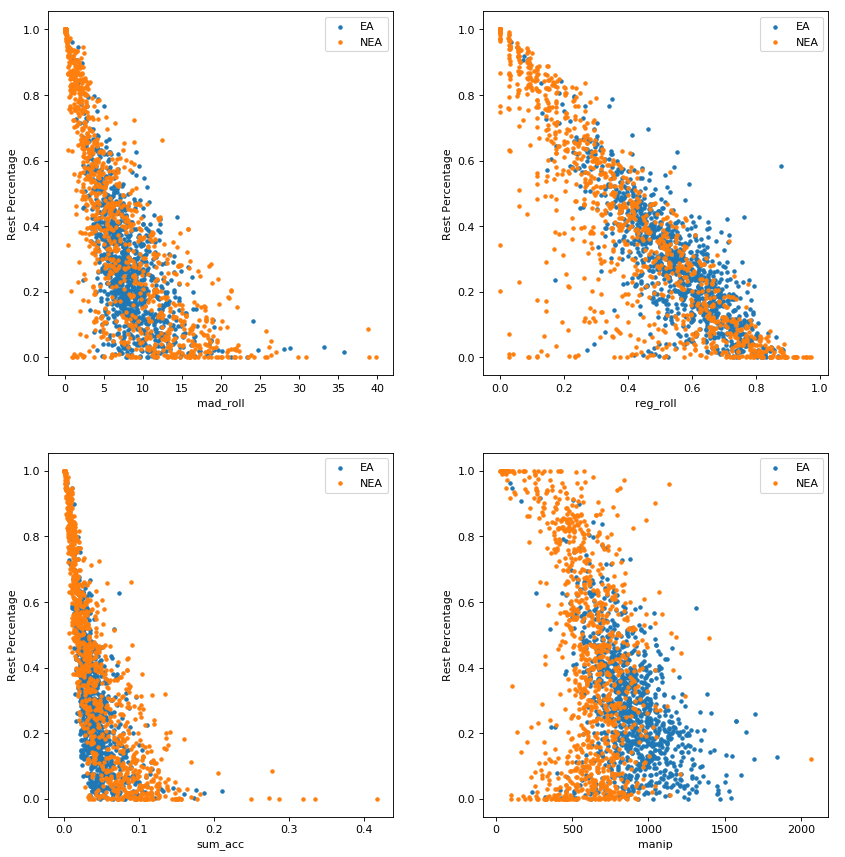

In [4]:
flist1 = createfigure2_2()
SampledNEAData = np.random.choice(FullNEAData, EAData.size)

featnames = ('mad_roll', 'reg_roll', 'sum_acc', 'manip', 'rest_perc')

for X, plot in zip(featnames[:4],(flist1[1], flist1[2], flist1[3], flist1[4])):
    plt.sca(plot)
    plt.scatter(EAData[X], EAData['rest_perc'], marker =  '.', label = 'EA')
    plt.scatter(SampledNEAData[X], SampledNEAData['rest_perc'], marker = '.', label = 'NEA')
    plot.set_xlabel(X) # Operates on given subplot
    plot.set_ylabel('Rest Percentage')
    plot.legend(loc=1)

plt.show()

### Plot other features against each other